# 2022-12-14
### Decision Trees and Random Forrests

In [85]:
import pandas as pd

from typing import List, Dict, Any

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

## Decision Trees

In [7]:
df = pd.read_csv("./example_class.csv")
df.head(10)

,Loves Winter,Loves Disney,Age,Likes Frozen
0,1,1,7,0
1,1,0,12,0
2,0,1,18,1
3,0,1,35,1
4,1,1,38,1
5,1,0,50,0
6,0,0,83,0


![](./images/diagram1.jpg)

Gini Impurity for leaf = 1 - (the probability of YES)^2 - (the probability of NO)^2

![](./images/diagram2.jpg)

Total Gini Impurity = (number of samples in leaf / total number of samples in both leafes) * Gini impurity + ...


In [8]:
clf = DecisionTreeClassifier()
clf.fit(df[["Loves Winter", "Loves Disney", "Age"]].values, y=df["Likes Frozen"].values)

DecisionTreeClassifier()

In [13]:
df.loc[df["Loves Disney"] == 0]

,Loves Winter,Loves Disney,Age,Likes Frozen
1,1,0,12,0
5,1,0,50,0
6,0,0,83,0


In [15]:
df.loc[df["Loves Disney"] != 0].drop("Loves Disney", axis=1)

,Loves Winter,Age,Likes Frozen
0,1,7,0
2,0,18,1
3,0,35,1
4,1,38,1


[Text(0.4, 0.8333333333333334, 'Loves Disney <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.5, 'Age <= 12.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

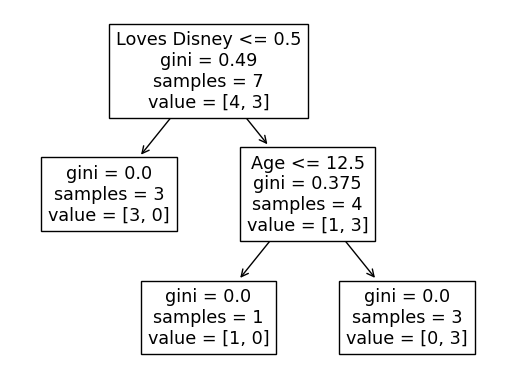

In [12]:
tree.plot_tree(clf, feature_names=["Loves Winter", "Loves Disney", "Age"])

![](./images/diagram6.png)

![](./images/diagram7.png)

![](./images/diagram8.png)

![](./images/diagram9.png)

![](./images/diagram10.png)


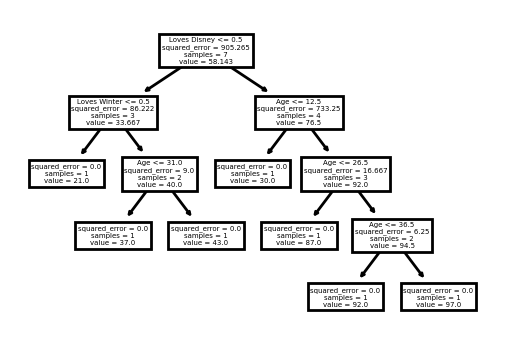

In [36]:
df["Rating"] = [30, 37, 87, 92, 97, 43, 21]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(df[["Loves Winter", "Loves Disney", "Age"]].values, df["Rating"].values)

plt.figure(figsize=(3, 2), dpi=200)
tree.plot_tree(clf, feature_names=["Loves Winter", "Loves Disney", "Age"])
plt.show()

In [22]:
df.loc[df["Loves Disney"] == 0].drop("Loves Disney", axis=1)

,Loves Winter,Age,Likes Frozen,Rating
1,1,12,0,37
5,1,50,0,43
6,0,83,0,21


In [25]:
df.loc[(df["Loves Disney"] == 0) & (df["Loves Winter"] == 1)].drop(["Loves Disney", "Loves Winter", "Likes Frozen"], axis=1)

,Age,Rating
1,12,37
5,50,43


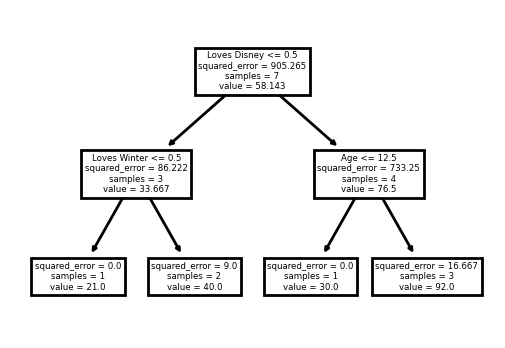

In [33]:
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(df[["Loves Winter", "Loves Disney", "Age"]].values, df["Rating"].values)

plt.figure(figsize=(3, 2), dpi=200)
tree.plot_tree(clf, feature_names=["Loves Winter", "Loves Disney", "Age"])
plt.show()

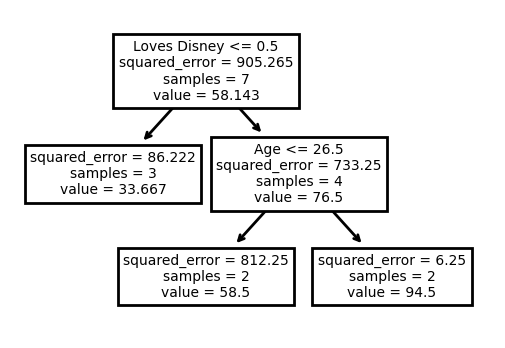

In [34]:
clf = tree.DecisionTreeRegressor(min_samples_leaf=2)
clf = clf.fit(df[["Loves Winter", "Loves Disney", "Age"]].values, df["Rating"].values)

plt.figure(figsize=(3, 2), dpi=200)
tree.plot_tree(clf, feature_names=["Loves Winter", "Loves Disney", "Age"])
plt.show()

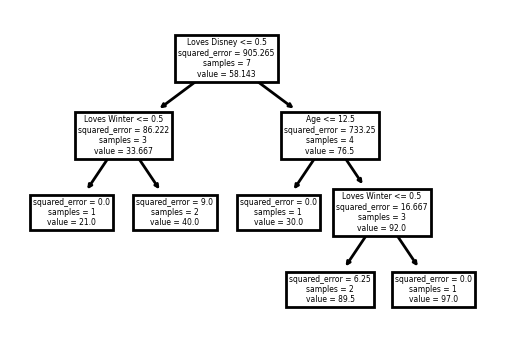

In [35]:
clf = tree.DecisionTreeRegressor(min_samples_split=3)
clf = clf.fit(df[["Loves Winter", "Loves Disney", "Age"]].values, df["Rating"].values)

plt.figure(figsize=(3, 2), dpi=200)
tree.plot_tree(clf, feature_names=["Loves Winter", "Loves Disney", "Age"])
plt.show()

## Random Forrest

In [55]:
df = pd.read_csv("./example_class.csv")
df["Rating"] = [30, 37, 87, 92, 97, 43, 21]
df.head(10)

,Loves Winter,Loves Disney,Age,Likes Frozen,Rating
0,1,1,7,0,30
1,1,0,12,0,37
2,0,1,18,1,87
3,0,1,35,1,92
4,1,1,38,1,97
5,1,0,50,0,43
6,0,0,83,0,21


In [58]:
SAMPLES_COUNT = 6
FEATURES_COUNT = 2

In [101]:
# creating forrest
class RandomForrest:
    def __init__(self, samples_count: int = 6, features_count: int = 2, trees_count: int = 5) -> None:
        self._trees: List[DecisionTreeRegressor] = []
        self._samples_count = samples_count
        self._features_count = features_count
        self._trees_count: List[Dict[str, Any]] = trees_count

    def fit(self, df: pd.DataFrame) -> None:
        for i in range(0, self._trees_count):
            df1 = df.sample(self._samples_count, replace=True)
            y = df1["Rating"].values
            df1.drop("Rating", axis=1, inplace=True)
            df1 = df1.sample(n=self._features_count,axis="columns")
            x = df1.values
            clf = tree.DecisionTreeRegressor()
            clf.fit(x, y)
            self._trees.append({"clf": clf, "sampled_features": df1.columns})

    def predict(self, df: pd.DataFrame) -> None:
        predictions: List[float] = []
        for clf in self._trees:
            predictions.append(clf["clf"].predict(df[clf["sampled_features"]].values))
        return np.array(predictions).mean(axis=1)

    def plot_forrest(self) -> None:
        for clf in self._trees:
            plt.figure(figsize=(2, 1), dpi=200)
            tree.plot_tree(clf["clf"], feature_names=clf["sampled_features"], filled=True)
            plt.show()

In [102]:
forrest = RandomForrest()
forrest.fit(df)

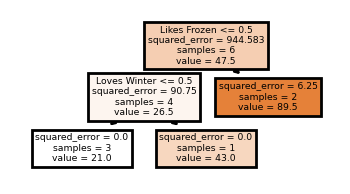

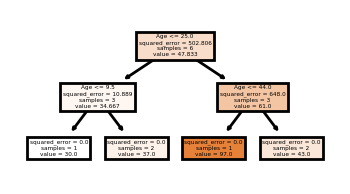

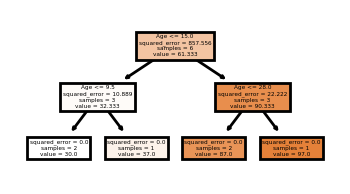

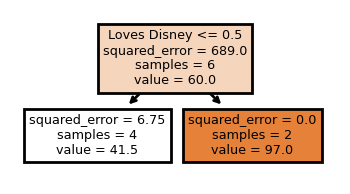

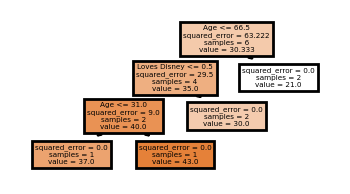

In [103]:
forrest.plot_forrest()

In [104]:
forrest.predict(df)

array([59.78571429, 54.85714286, 77.42857143, 73.21428571, 31.57142857])

In [105]:
df

,Loves Winter,Loves Disney,Age,Likes Frozen,Rating
0,1,1,7,0,30
1,1,0,12,0,37
2,0,1,18,1,87
3,0,1,35,1,92
4,1,1,38,1,97
5,1,0,50,0,43
6,0,0,83,0,21


In [86]:
clf = RandomForestRegressor()
clf.fit(df[["Loves Winter", "Loves Disney", "Age", "Likes Frozen"]], df["Rating"])

RandomForestRegressor()

In [107]:
clf.predict(df[["Loves Winter", "Loves Disney", "Age", "Likes Frozen"]])

array([44.9 , 39.5 , 87.48, 92.55, 93.35, 45.27, 36.02])

In [90]:
len(clf.estimators_)

100

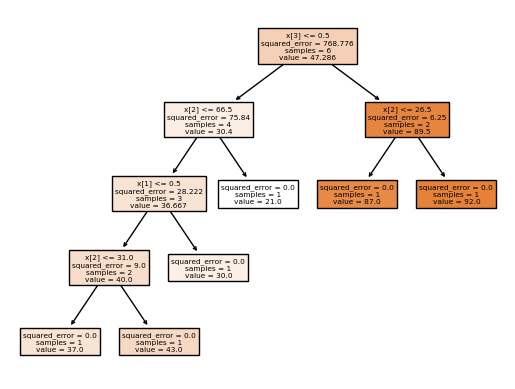

In [88]:
_ = tree.plot_tree(clf.estimators_[1], filled=True)

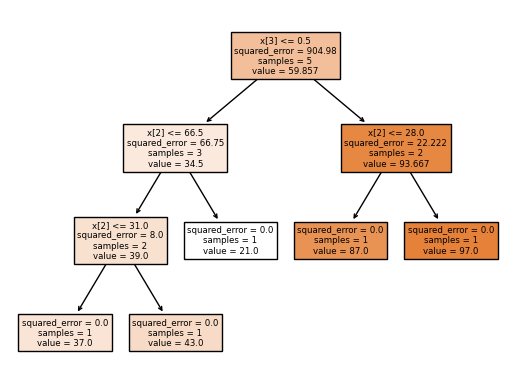

In [89]:
_ = tree.plot_tree(clf.estimators_[0], filled=True)

### Hyperparameters optimization

In [111]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, truncnorm, randint

In [109]:
# Load data
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(X.shape)

(442, 10)


In [110]:
# splitting data

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [112]:
# training with default params

clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

7293.882882882883


In [113]:
# training with selected params

clf = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

5171.440614972813


In [114]:
possible_decision_tree_params = {
    "min_samples_leaf": randint(1, 500),
    "max_depth": randint(1, 600),
    "min_samples_split": uniform(0.01, 0.199)
}

In [119]:
decision_tree = DecisionTreeRegressor()

search = RandomizedSearchCV(decision_tree, possible_decision_tree_params, n_iter=100, cv=7, random_state=42)

search.fit(x_train, y_train)

RandomizedSearchCV(cv=7, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a2827100>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a22b7f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2a2817910>},
                   random_state=42)

In [121]:
train_hyperparams = search.best_estimator_.get_params()

In [122]:
clf = DecisionTreeRegressor(**train_hyperparams)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

4829.594248011048


In [127]:
# Training random forrest

clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

4295.313698198198


In [128]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [133]:
# Searching for the best random forrest

params = {
    "n_estimators": randint(5, 500),
    "min_samples_leaf": randint(1, 500),
    "max_depth": randint(10, 300),
    "min_samples_split": uniform(0.01, 0.199)
}

forrest = RandomForestRegressor()

search = RandomizedSearchCV(forrest, params, n_iter=100, cv=7, random_state=42)

search.fit(x_train, y_train)


clf = RandomForestRegressor(**search.best_estimator_.get_params())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

4218.745752637631


In [135]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 156,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 0.014838877319859315,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 53,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}